In [274]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score,roc_auc_score,recall_score,confusion_matrix,accuracy_score
import tabulate
from sklearn.neural_network import MLPClassifier

In [275]:
df=pd.read_csv('./datasets/d1.csv')

In [276]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [277]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [278]:
from sklearn.preprocessing import LabelEncoder

In [279]:
lr=LabelEncoder()
geog=lr.fit_transform(df['Geography'])
Gender= lr.fit_transform(df['Gender'])


In [280]:
df['Geography']=geog
df['Gender']=Gender

In [281]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [282]:
df.drop(['Surname','RowNumber','CustomerId'],axis=1,inplace=True)

In [283]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [284]:
df_cor=df.corr()

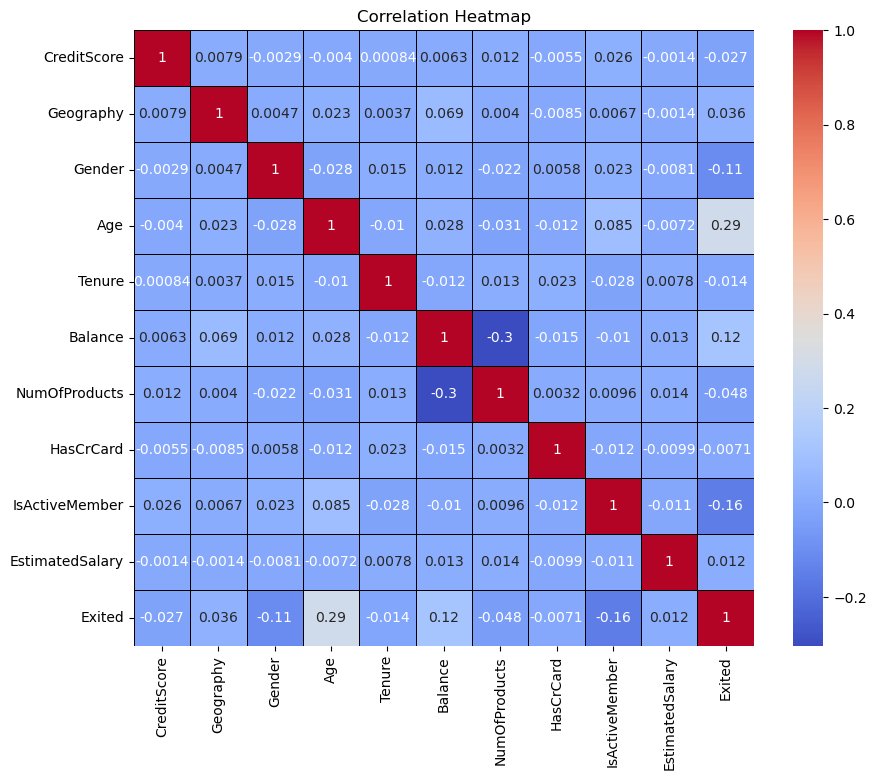

In [285]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cor, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [286]:
mask = np.abs(df_cor) >= 0.3

In [287]:
print(mask)

                 CreditScore  Geography  Gender    Age  Tenure  Balance  \
CreditScore             True      False   False  False   False    False   
Geography              False       True   False  False   False    False   
Gender                 False      False    True  False   False    False   
Age                    False      False   False   True   False    False   
Tenure                 False      False   False  False    True    False   
Balance                False      False   False  False   False     True   
NumOfProducts          False      False   False  False   False     True   
HasCrCard              False      False   False  False   False    False   
IsActiveMember         False      False   False  False   False    False   
EstimatedSalary        False      False   False  False   False    False   
Exited                 False      False   False  False   False    False   

                 NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
CreditScore          

In [288]:
print(df.describe())

        CreditScore     Geography        Gender           Age        Tenure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     650.528800      0.746300      0.545700     38.921800      5.012800   
std       96.653299      0.827529      0.497932     10.487806      2.892174   
min      350.000000      0.000000      0.000000     18.000000      0.000000   
25%      584.000000      0.000000      0.000000     32.000000      3.000000   
50%      652.000000      0.000000      1.000000     37.000000      5.000000   
75%      718.000000      1.000000      1.000000     44.000000      7.000000   
max      850.000000      2.000000      1.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.00

In [289]:
print(tabulate.tabulate(df.describe(), headers='keys', tablefmt='pretty'))

+-------+-------------------+--------------------+---------------------+--------------------+-------------------+-------------------+--------------------+---------------------+--------------------+-------------------+---------------------+
|       |    CreditScore    |     Geography      |       Gender        |        Age         |      Tenure       |      Balance      |   NumOfProducts    |      HasCrCard      |   IsActiveMember   |  EstimatedSalary  |       Exited        |
+-------+-------------------+--------------------+---------------------+--------------------+-------------------+-------------------+--------------------+---------------------+--------------------+-------------------+---------------------+
| count |      10000.0      |      10000.0       |       10000.0       |      10000.0       |      10000.0      |      10000.0      |      10000.0       |       10000.0       |      10000.0       |      10000.0      |       10000.0       |
| mean  |     650.5288      |       0.74

In [290]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [291]:
from sklearn.linear_model import Perceptron

In [292]:
model = Perceptron()

In [293]:
X=df.drop('Exited',axis=1).values
Y=df['Exited'].values


In [294]:
from sklearn.model_selection import train_test_split

In [295]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [296]:
model.fit(xtrain,ytrain)

Perceptron()

In [297]:
ypred=model.predict(xtest)
print('accuarcy is ',classification_report(ytest,ypred))
print('f1 score is ',f1_score(ytest,ypred))
print('recall score is ',recall_score(ytest,ypred))
print('roc_auc_score is ',roc_auc_score(ytest,ypred))


accuarcy is                precision    recall  f1-score   support

           0       0.91      0.01      0.02      2416
           1       0.20      0.99      0.33       584

    accuracy                           0.20      3000
   macro avg       0.55      0.50      0.18      3000
weighted avg       0.77      0.20      0.08      3000

f1 score is  0.32713963963963966
recall score is  0.9948630136986302
roc_auc_score is  0.5034331624784542


In [298]:
print('confusion_matrix is ',confusion_matrix(ytest,ypred))

confusion_matrix is  [[  29 2387]
 [   3  581]]


In [299]:
model = MLPClassifier(
    hidden_layer_sizes=(1000,),  
    activation='relu',          
    solver='adam',                  alpha=0.0001,                   max_iter=200,               
    random_state=42             
)
model1= MLPClassifier(
    hidden_layer_sizes=(100,),  
    activation='logistic',          
    solver='adam',                  alpha=0.0001,                   max_iter=200,               
    random_state=42             
)
model2= MLPClassifier(
    hidden_layer_sizes=(100,),  
    activation='tanh',          
    solver='adam',                  alpha=0.0001,                   max_iter=200,  learning_rate='adaptive',             
    random_state=42             
)



In [300]:
model.fit(xtrain, ytrain)
model1.fit(xtrain, ytrain)
model2.fit(xtrain, ytrain)

MLPClassifier(activation='tanh', learning_rate='adaptive', random_state=42)

In [301]:
ypred = model.predict(xtest)
ypred1 = model1.predict(xtest)
ypred2 = model2.predict(xtest)


In [302]:

print('Accuracy:', classification_report(ytest, ypred))
print('F1 Score:', f1_score(ytest, ypred))
print('Recall Score:', recall_score(ytest, ypred))
print('ROC AUC Score:', roc_auc_score(ytest, ypred))
print('Confusion Matrix:', confusion_matrix(ytest, ypred))

Accuracy:               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.33      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.57      0.50      0.45      3000
weighted avg       0.71      0.81      0.72      3000

F1 Score: 0.0034071550255536627
Recall Score: 0.0017123287671232876
ROC AUC Score: 0.5004422570987934
Confusion Matrix: [[2414    2]
 [ 583    1]]


In [303]:
print('Accuracy:', classification_report(ytest, ypred1))
print('F1 Score:', f1_score(ytest, ypred1))
print('Recall Score:', recall_score(ytest, ypred1))
print('ROC AUC Score:', roc_auc_score(ytest, ypred1))

Accuracy:               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000

F1 Score: 0.0
Recall Score: 0.0
ROC AUC Score: 0.5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [304]:
print('Accuracy:', classification_report(ytest, ypred2))
print('F1 Score:', f1_score(ytest, ypred2))
print('Recall Score:', recall_score(ytest, ypred2))
print('ROC AUC Score:', roc_auc_score(ytest, ypred2))

Accuracy:               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000

F1 Score: 0.0
Recall Score: 0.0
ROC AUC Score: 0.5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [305]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model = MLPClassifier(
    hidden_layer_sizes=(1000,),  
    activation='relu',          
    solver='adam',                  
    alpha=0.0001,                   
    max_iter=200,               
    random_state=42             
)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print("Accuracy:", model.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.459
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.38      0.53      1578
           1       0.24      0.75      0.37       422

    accuracy                           0.46      2000
   macro avg       0.55      0.57      0.45      2000
weighted avg       0.72      0.46      0.49      2000

F1 Score: 0.36946386946386944
Recall Score: 0.7511848341232228
ROC AUC Score: 0.5732659975131998
Confusion Matrix:
 [[601 977]
 [105 317]]


In [306]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, roc_auc_score
from sklearn.neural_network import MLPClassifier


In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
smote_enn = SMOTEENN(random_state=42)

In [312]:
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)
model = MLPClassifier(
    hidden_layer_sizes=(1000,),  
    activation='relu',          
    solver='adam',                  
    alpha=0.0001,                   
    max_iter=200,               
    random_state=42             
)


In [309]:
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='f1_weighted')
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)


In [310]:

print("Cross-Validation F1 Scores:", cross_val_scores)
print("Mean Cross-Validation F1 Score:", cross_val_scores.mean())
print("Accuracy:", model.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-Validation F1 Scores: [0.51613211 0.35421784 0.64093822 0.27976469 0.6483389 ]
Mean Cross-Validation F1 Score: 0.4878783524373622
Accuracy: 0.474
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.41      0.55      1578
           1       0.24      0.71      0.36       422

    accuracy                           0.47      2000
   macro avg       0.54      0.56      0.46      2000
weighted avg       0.71      0.47      0.51      2000

F1 Score: 0.3624242424242424
Recall Score: 0.7085308056872038
ROC AUC Score: 0.5668778044077631
Confusion Matrix:
 [[649 929]
 [123 299]]
